<a href="https://colab.research.google.com/github/sjekic/DiabetesPrediction/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
from tabulate import tabulate

In [97]:
file_path = "diabetes.csv"
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "uciml/pima-indians-diabetes-database",
    file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


<ipython-input-97-c8e3bace325a>:2: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


In [98]:
print("First 5 records:\n")
print(tabulate(df.head(), headers='keys', tablefmt='grid'))

First 5 records:

+----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------+
|    |   Pregnancies |   Glucose |   BloodPressure |   SkinThickness |   Insulin |   BMI |   DiabetesPedigreeFunction |   Age |   Outcome |
+====+===============+===========+=================+=================+===========+=======+============================+=======+===========+
|  0 |             6 |       148 |              72 |              35 |         0 |  33.6 |                      0.627 |    50 |         1 |
+----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------+
|  1 |             1 |        85 |              66 |              29 |         0 |  26.6 |                      0.351 |    31 |         0 |
+----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------+
| 

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All data is numerical hence there will be no need for one-hot encoding.

In [100]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [101]:
(df == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


From this illogical values can be:
- glucose (as below 54 is considered for need for immediate action, this is impossible)
- blood pressure
- skin thickness
- insulin
- BMI

As the total amount of rows is 768, simply deleting the rows with missing data (which would be at least 374) would seriously decrease the size of the dataset and harm the accuracy of the prediction. Instead it is better to impute it. Depending on what the histograms show, an imputation technique will be chosen.

In [102]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [103]:
import numpy as np
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

In [104]:
df[columns_with_zeros] = df[columns_with_zeros].astype(float)

In [105]:
df.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


For the columns where there are illogical zeros we need to replace them with a NaN value because otherwise they will affect the mean/median used for imputing.

<Axes: >

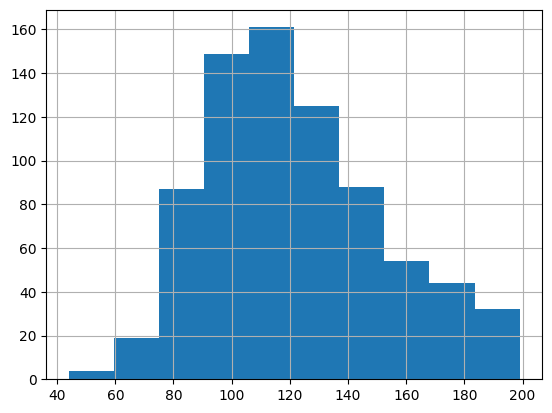

In [106]:
df['Glucose'].hist()

The median and the mean of glucose are very close in values, hence it is fine imputing it with either.

In [107]:
df["Glucose"]=df["Glucose"].replace(np.nan,df["Glucose"].mean())

<Axes: >

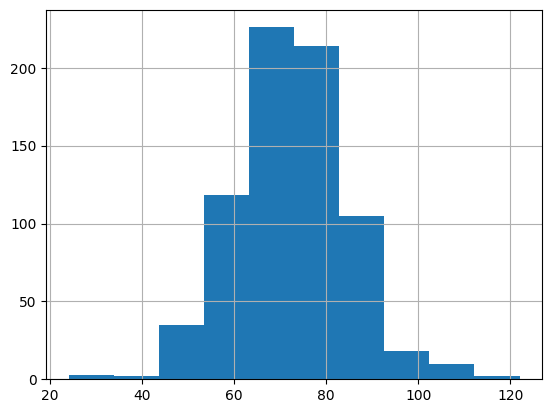

In [108]:
df["BloodPressure"].hist()

In [109]:
df["BloodPressure"]=df["BloodPressure"].replace(np.nan, df["BloodPressure"].mean())

<Axes: >

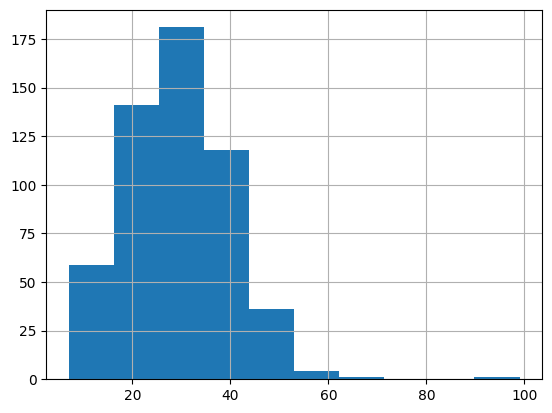

In [110]:
df["SkinThickness"].hist()

In [119]:
df["SkinThickness"]=df["SkinThickness"].replace(np.nan, df["SkinThickness"].mean())

<Axes: >

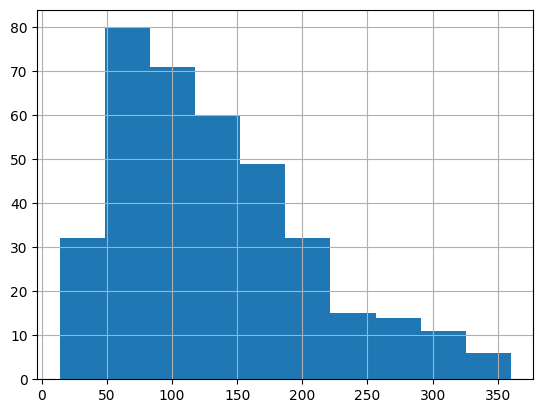

In [120]:
df["Insulin"].hist()

Based on the histogram we can see that most of the values of insulin are between ~20 to ~180. In general, values above 300 are considered rare and extreme and the ones above 400 can be removed. Furthermore I performed an outlier detection to confirm which values to remove.

In [113]:
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Insulin'] < lower_bound) | (df['Insulin'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"Lower bound: {lower_bound:.2f}")

Number of outliers: 24
Upper bound: 360.62
Lower bound: -94.38


Our upper bound based on outlier detection is 360 and the program computed 24 outliers. Since this is a small number of rows in comparison to the total, I will remove them from the dataset.

In [114]:
df = df[df["Insulin"]<upper_bound]

<Axes: >

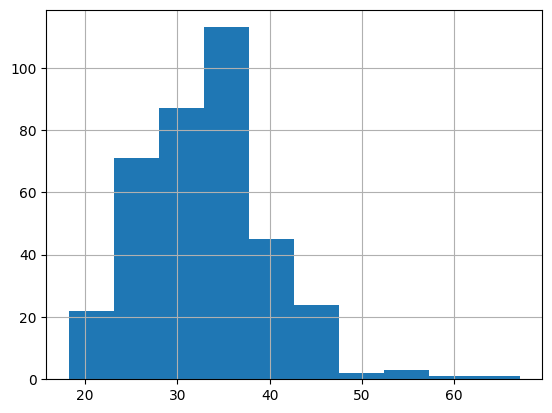

In [115]:
df["BMI"].hist()

In [121]:
df["BMI"]=df["BMI"].replace(np.nan,df["BMI"].mean())

In [122]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Now that we've removed and imputed missing data we can continue analyzing it.

In [123]:
df['Outcome'].value_counts(normalize=True)

,proportion
Outcome,
0,0.686486
1,0.313514


<Axes: xlabel='Outcome', ylabel='count'>

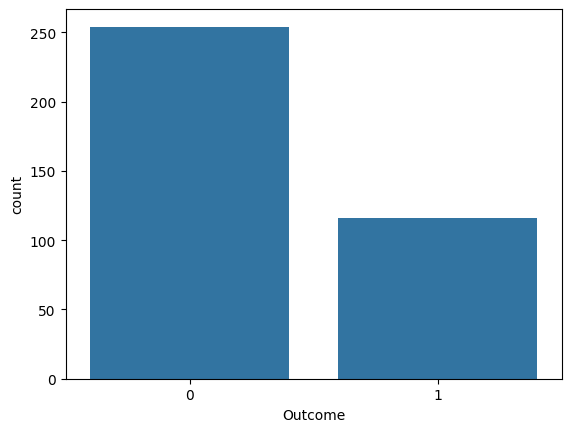

In [124]:
import seaborn as sns
sns.countplot(x='Outcome', data=df)

By checking the proportion of patients suffering from diabetes we can know if there is a class imbalance, because if there is we might get high accuracy just because most of the data i.e. 90% is only one class. Here there is no strong class imbalance as the number of patients with diabetes represents approximately 32% in comparison to patients without it at 68%.